Basic waveform and calculation checks.

In [4]:
%load_ext autoreload
%autoreload 2

# Lots of small/large numbers involved in these calculations, so
# need to use 64-bit mode
from jax.config import config
config.update("jax_enable_x64", True)

import jax
import jax.numpy as jnp
from jax import random
from corner import corner
from tqdm.auto import tqdm, trange

from pydd.binary import *
from pydd.analysis import *
from pydd.noise import *
# from test_binary import test_SNR_loglikelihood
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Plotting checks

In [5]:
m_1 = 1e3 * MSUN
m_2 = 1 * MSUN
rho_s = 226 * MSUN / PC**3
gamma_s = 7 / 3
f_l = jnp.array(0.022621092492458004)  # Hz

vb = make_vacuum_binary(m_1, m_2)
sd = make_static_dress(m_1, m_2, rho_s, gamma_s)
dd = make_dynamic_dress(m_1, m_2, rho_s, gamma_s)
hd = make_hypgeom_dress(m_1, m_2, rho_s, gamma_s)

Text(0, 0.5, '$\\Phi_V - \\Phi$ [rad]')

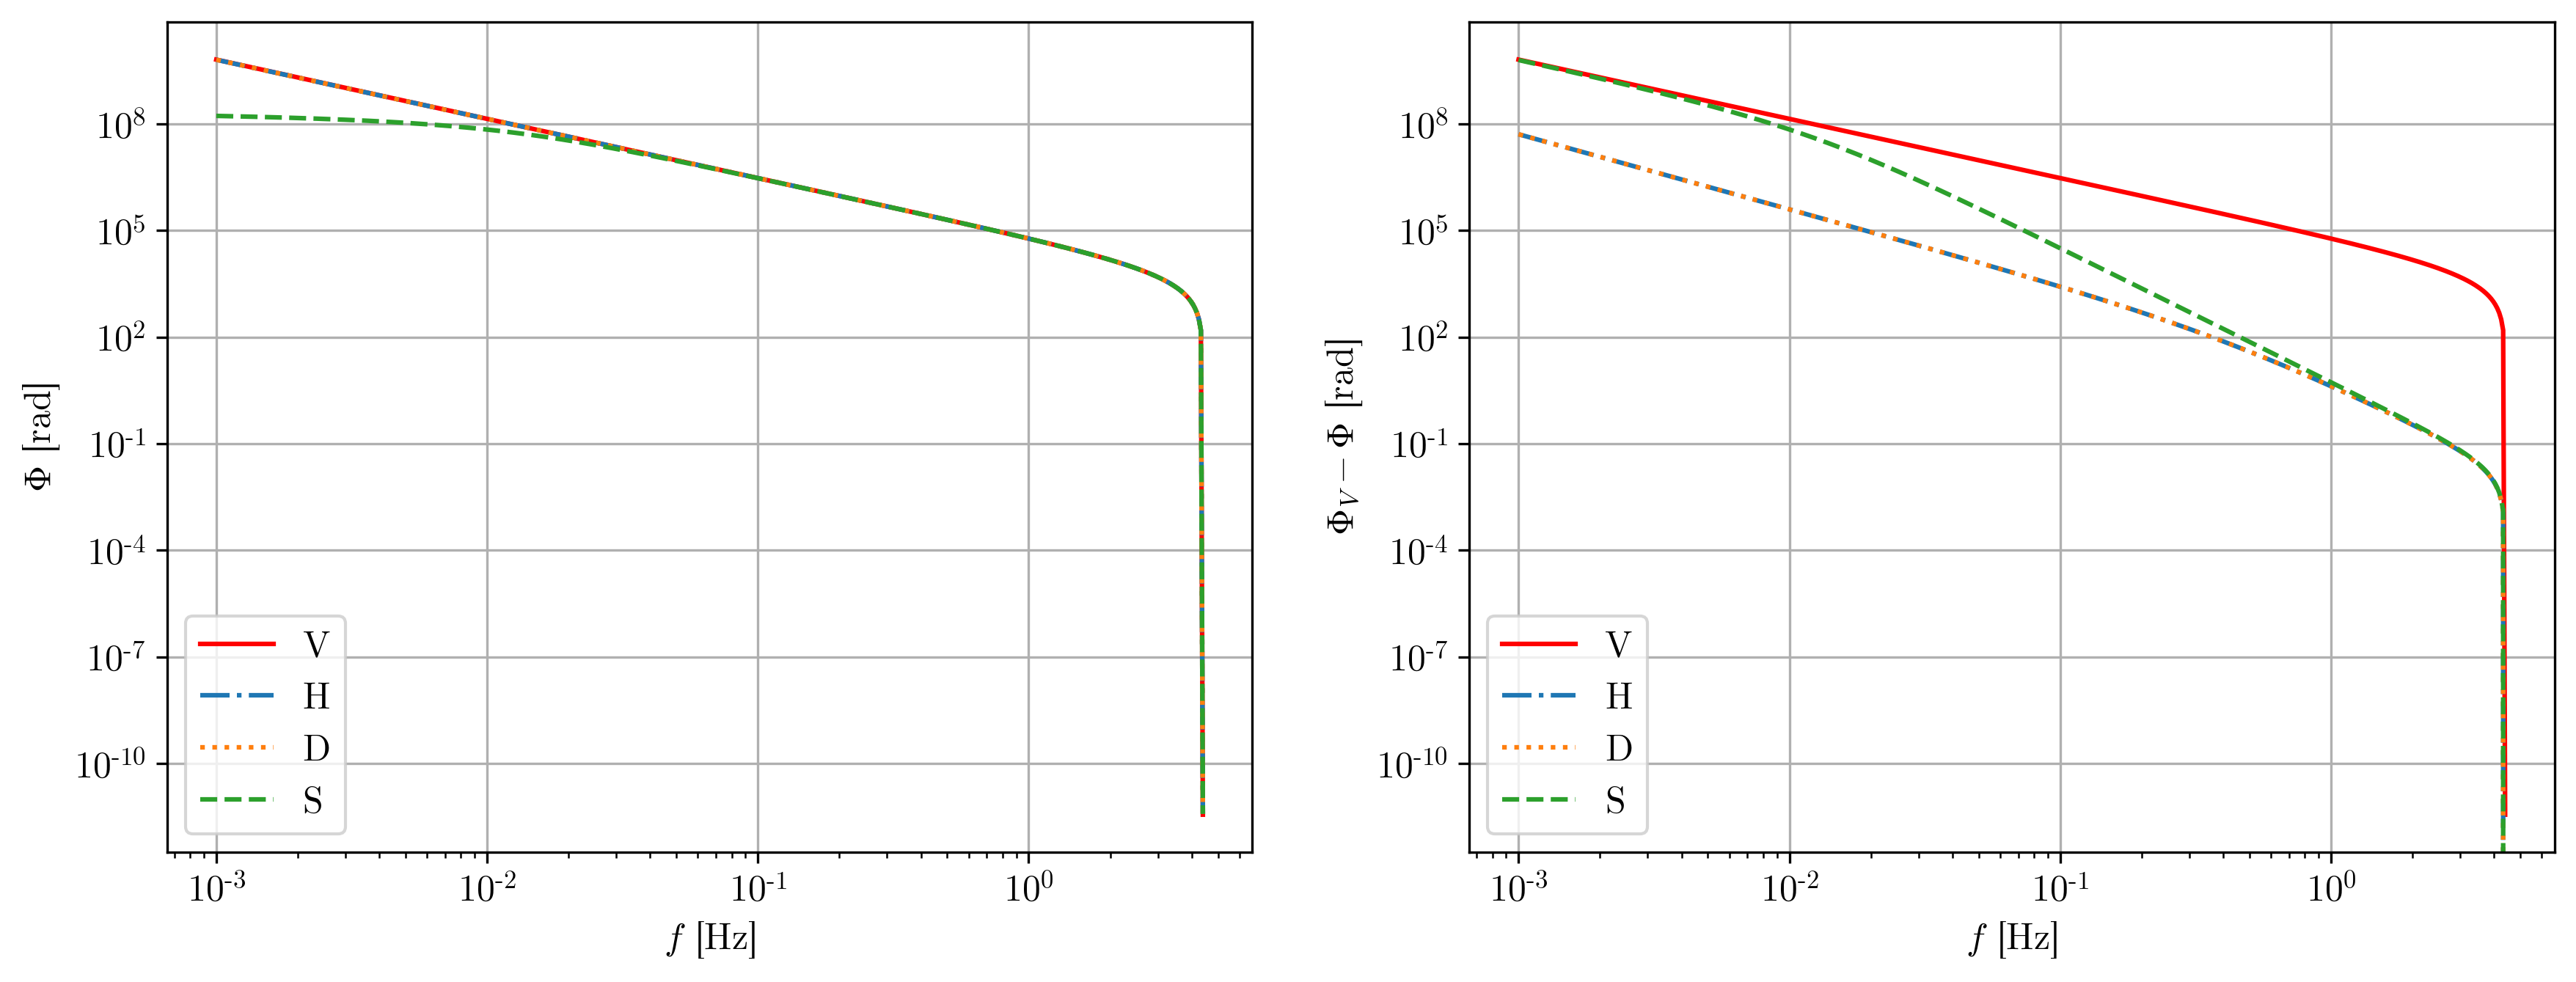

In [9]:
f = jnp.geomspace(1e-3, vb.f_c, 500)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax = axes[0]
ax.loglog(f, Phi_to_c(f, vb), "r", label="V")
ax.loglog(f, Phi_to_c(f, hd), "-.", label="H")
ax.loglog(f, Phi_to_c(f, dd), ":", label="D")
ax.loglog(f, Phi_to_c(f, sd), "--", label="S")
ax.legend()
ax.grid()
ax.set_xlabel(r"$f$ [Hz]")
ax.set_ylabel(r"$\Phi$ [rad]")

ax = axes[1]
ax.loglog(f, Phi_to_c(f, vb), "r", label="V")
ax.loglog(f, Phi_to_c(f, vb) - Phi_to_c(f, hd), "-.", label="H")
ax.loglog(f, Phi_to_c(f, vb) - Phi_to_c(f, dd), ":", label="D")
ax.loglog(f, Phi_to_c(f, vb) - Phi_to_c(f, sd), "--", label="S")
ax.legend()
ax.grid()
ax.set_xlabel(r"$f$ [Hz]")
ax.set_ylabel(r"$\Phi_V - \Phi$ [rad]")

Text(0, 0.5, '$\\Psi_V - \\Psi$ [rad]')

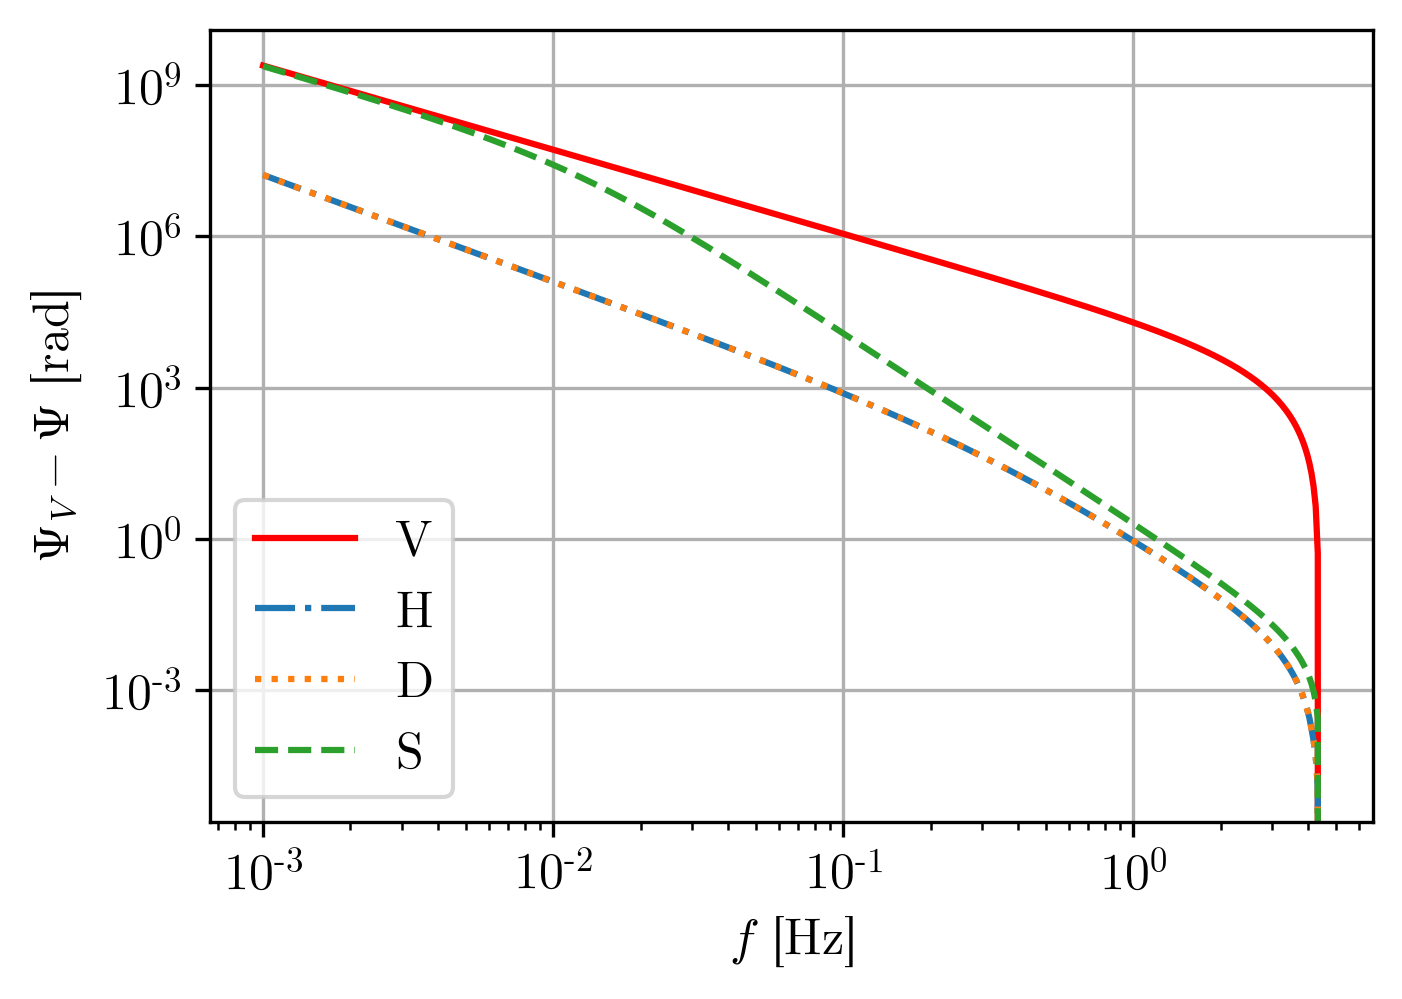

In [11]:
f = jnp.geomspace(1e-3, vb.f_c, 500)
fig, ax = plt.subplots(1, 1)#, figsize=(14, 5))

ax.loglog(f, Psi(f, vb), "r", label="V")
ax.loglog(f, Psi(f, vb) - Psi(f, hd), "-.", label="H")
ax.loglog(f, Psi(f, vb) - Psi(f, dd), ":", label="D")
ax.loglog(f, Psi(f, vb) - Psi(f, sd), "--", label="S")
ax.legend()
ax.grid()
ax.set_xlabel(r"$f$ [Hz]")
ax.set_ylabel(r"$\Psi_V - \Psi$ [rad]")

## Likelihood checks

Should give roughly:
```
SNR(s) =  9.193779235810998
SNR(h) =  9.196551816697275
log L(s|s) =  42.262788318414735
log L(h|h) =  42.28828265859896
log L(h|s) =  42.08482816097782
```

In [2]:
# Slow the first time due to compilation overhead
test_SNR_loglikelihood()
test_SNR_loglikelihood(verbose=True)

SNR(s) =  9.193760960111335
SNR(h) =  9.196536000395968
log L(s|s) =  42.26262029583365
log L(h|h) =  42.288137203289544
log L(h|s) =  42.08419191768354


In [3]:
%timeit test_SNR_loglikelihood()

10 ms ± 76 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
%timeit test_SNR_loglikelihood()

10.3 ms ± 118 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
